In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel('jogo.xlsx') 
data_ = data.fillna(0)

In [3]:
df = pd.DataFrame(data_)

In [4]:
deletar = df.loc[((df.Global_Sales) < 0.001) & ((df.Total_Shipped) <  0.001)]
a = deletar.index
dados = df.drop(a)

In [5]:
dados["Sales"] = df["Global_Sales"] + df["Total_Shipped"]

In [6]:
df_ = dados.loc[((dados.Critic_Score !=0) & ((dados.Sales != 0)))]

In [7]:
xc = df_.loc[:,["Critic_Score"]].values
yc = (df_.loc[:,["Sales"]]*1000).values

In [8]:
xc = pd.DataFrame(xc)
yc = pd.DataFrame(yc)

In [9]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [10]:
regressor.fit(xc, yc) 

C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

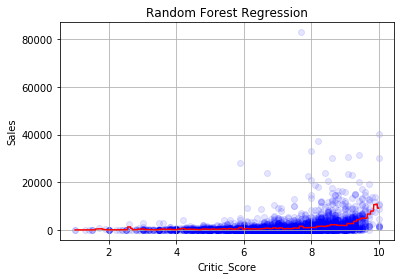

In [11]:


# Visualising the Random Forest Regression results 
  
# arange for creating a range of values 
# from min value of x to max  
# value of x with a difference of 0.01  
# between two consecutive values 
X_grid = np.arange(min(xc.values), max(xc.values), 0.01)  

# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# Scatter plot for original data 
plt.scatter(xc.values, yc.values, color = 'blue', alpha=0.1)   
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid),  
         color = 'red')  
plt.title('Random Forest Regression') 
plt.xlabel('Critic_Score') 
plt.ylabel('Sales') 
plt.grid(True)
plt.show()

In [12]:
nota = int(input("Nota: "))
d = df_.loc[df_.Critic_Score == nota]
media = d.Sales.mean()*1000
minha = regressor.predict([[nota]])
print(media, minha)

Nota: 8
1086.0606060606071 [1090.67988326]


In [13]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
x_train, x_test, y_train, y_test = train_test_split(xc, yc, test_size=0.33, random_state=RANDOM_SEED)

In [14]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3153, 1), (3153, 1), (1553, 1), (1553, 1))

In [15]:
regressor.fit(x_train, y_train) 

C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
ylinha = regressor.predict(x_test)

In [27]:
ylinha_ = pd.DataFrame(ylinha) 
y_test_ = pd.DataFrame(y_test)
y_test_

,0
2592,340.0
915,1450.0
287,4050.0
691,1990.0
2526,360.0
2614,330.0
2907,260.0
3944,90.0
2897,260.0
2822,280.0


In [19]:
ylinha_certo = ylinha_.reindex()
y_test_certo = y_test_.reindex()

,0
2592,340.0
915,1450.0
287,4050.0
691,1990.0
2526,360.0
2614,330.0
2907,260.0
3944,90.0
2897,260.0
2822,280.0


In [24]:
ylinha_certo.join(y_test_certo, lsuffix='_caller', rsuffix='_other')

,0_caller,0_other
0,2166.268444,NaN
1,462.499264,NaN
2,2892.154169,NaN
3,576.977191,NaN
4,980.821636,NaN
5,808.814036,NaN
6,406.197143,30220.0
7,1595.290205,NaN
8,550.111883,28020.0
9,1701.207643,NaN


In [22]:
mean_squared_error(ylinha_certo, y_test_certo)

2423070.697779764

In [128]:
squarede = r2_score(y_test, ylinha)

In [129]:
squarede

0.10660425357265835